In [68]:
%%HTML
<a href='https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb'>https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb</a>
<br/>
<a href='https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/'>https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/</a>

In [79]:
%%HTML
<h2>Support Vector Machine</h2>
It is a powerful and versatile machine learning model capable of performing linear and nonlinear regression, classification 
and even novelty detection. They are good for small to medium-sized nonlinear datasets(hundreds to thousands of instances), especially for classification tasks.
However, they don't scale well with large datasets.

<br/>
<br/>
It is a supervised machine-learning problem where we try to find a hyperplane that best separates the two classes. 
Note: Don’t get confused between SVM and logistic regression. 
Both the algorithms try to find the best hyperplane, but the main difference is logistic regression is a probabilistic approach whereas 
support vector machine is based on statistical approaches.

<br/>
<br/>
SVM works best when the dataset is small and complex. It is usually advisable to first use logistic regression and see how it performs, 
if it fails to give a good accuracy you can go for SVM without any kernel (will talk more about kernels in the later section). 
Logistic regression and SVM without any kernel have similar performance but depending on your features, one may be more efficient 
than the other.
<br/>
<br/>
<h4>Types of Support Vector Machine (SVM) Algorithms</h4>
<b>Linear SVM:</b> When the data is perfectly linearly separable only then we can use Linear SVM. Perfectly linearly separable means 
that the data points can be classified into 2 classes by using a single straight line(if 2D).
<br/>
<b>Non-Linear SVM:</b> When the data is not linearly separable then we can use Non-Linear SVM, which means when the data points cannot 
be separated into 2 classes by using a straight line (if 2D) then we use some advanced techniques like kernel tricks to classify them. 
In most real-world applications we do not find linearly separable data points hence we use kernel tricks to solve them.  
<br/>
<br/>
<b>SVM is sensitive to feature scaling, so always the does the feature scale the data for good performance.<b>
                                                                                            

In [14]:
%%HTML
<b>Support Vectors:</b> These are the points that are closest to the hyperplane. 
A separating line will be defined with the help of these data points.
<br/>
<b>Margin:</b> it is the distance between the hyperplane and the observations closest to the hyperplane (support vectors). 
In SVM large margin is considered a good margin. There are two types of margins hard margin and soft margin. 
<img src="images/svm1.png" width=400 />
Hard margin strictly imposes that all instances must be off the support vector line and on the correct side.
<br/>
soft margin eases the above rule.

In [43]:
%%HTML
<h3>How does linear SVM work?</h3>
Suppose we have a dataset that has two classes (green and blue). 
We want to classify the new data point as either blue or green.
<img src="images/svm2.png" width=400 />
To classify these points, we can have many decision boundaries, but the question is which is the best and how do we find it? 
NOTE: Since we are plotting the data points in a 2-dimensional graph we call this decision boundary 
a straight line but if we have more dimensions, we call this decision boundary a “hyperplane”.
<img src="images/svm3.png" width=400 />
The best hyperplane is that plane that has the maximum distance from both the classes, and this is the main aim of SVM. 
This is done by finding different hyperplanes that classify the labels in the best way 
then it will choose the one that is farthest from the data points or the one that has a maximum margin.
<img src="images/svm4.png" width=400 />

In [26]:
%%HTML

There is a regularization hyperparameter,<b>c</b>, which controls the margin of the SVM. 
If we set a low value, we end with the model on the left. 
it means that reducing the c makes the margin larger, so it leads to more margin violations.
If c is set to the high value, the margin will be lower.
<img src="images/svm5.jpg" width=600 />
Reducing the c leads to more data points to support the support vector, leads to less overfitting 
and otherwise, it leads to underfitting with high c.  we find the optimal value of ‘c’ using GridsearchCV and cross-validation.
    

In [37]:
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Iris virginica
y

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: target, Length: 150, dtype: bool

In [38]:
svm_clf = Pipeline([
    ("standard_scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, random_state=42))
])
svm_clf.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, random_state=42))])

In [39]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [40]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

In [45]:
%%HTML
<h3>How does nonlinear SVM work?</h3>
One approach to deal with no linearity is to add more features, such as  polynomial features(similar to what we did in polynomial regression).


In [48]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
X, y= make_moons(n_samples=100, noise=0.15, random_state=42)
polynomial_svm_clf = Pipeline([
    ("p_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=10,max_iter=10_1000, random_state=42))
])
polynomial_svm_clf.fit(X,y)


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('p_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=10, max_iter=101000, random_state=42))])

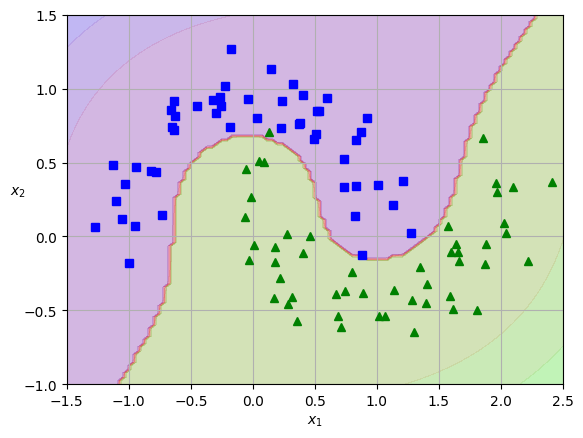

In [51]:
# extra code – this cell generates and saves Figure 5–6
import numpy as np
import matplotlib.pyplot as plt

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [53]:
%%HTML
It will work for most cases, especially if the degree of the polynomial is low(i.e. less complex data). 

We need a higher polynomial degree for complex datasets, so using linear SVC with polynomial features slows down the process.
Luckily we can use kernel trick to speed up the process. If the kernal trick using polynomial is called  Polynomial Kernel SVC

In [57]:
from sklearn.svm import SVC
X, y= make_moons(n_samples=100, noise=0.15, random_state=42)
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("poly_svc", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_svc', SVC(C=5, coef0=1, kernel='poly'))])

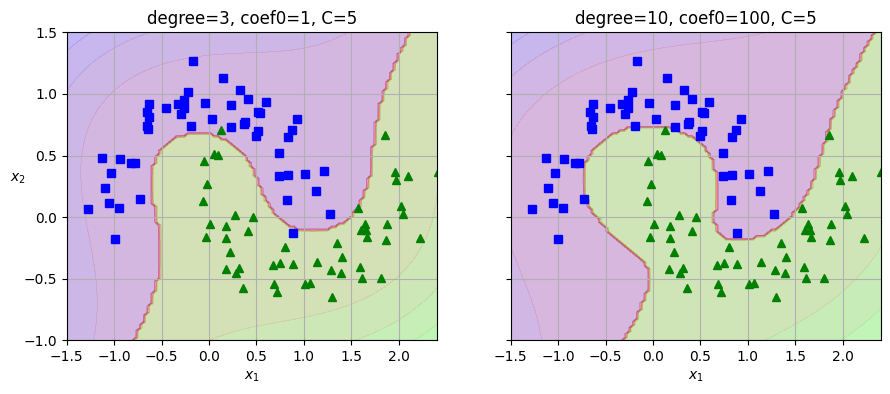

In [58]:
# extra code – this cell generates and saves Figure 5–7

poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")

plt.show()

In [66]:
%%HTML 
There are different types of kernel functions in SVM such as polynomial kernel, sigmoid kernel, gaussian RBF kernel etc. 
How do we choose the right one? 
<br/>
    <br/>
Choosing a kernel totally depends on what kind of dataset are you working on. If it is linearly separable then you must opt. 
for linear kernel function since it is very easy to use and the complexity is much lower compared to other kernel functions. 
I recommend you start with a hypothesis that your data is linearly separable and choose a linear kernel function. 
You can then work your way up towards the more complex kernel functions. 
Usually, we use SVM with RBF and linear kernel function because other kernels like polynomial kernel are rarely used due to 
poor efficiency.

In [71]:
%%HTML 
<h3>SVM Regression</h3>
Unlike Support Vector Machines (SVMs) used for classification tasks, 
SVR Model seeks a hyperplane that best fits the data points in a continuous space. This is achieved by mapping the input variables 
to a high-dimensional feature space and finding the hyperplane that maximizes the margin (distance) between the hyperplane and 
the closest data points, while also minimizing the prediction error.
<br/>
<br/>
SVR Model can handle non-linear relationships between the input and target variables by using a kernel function to map the data 
to a higher-dimensional space. This makes it a powerful tool for regression tasks where complex relationships may exist.
Support Vector Regression (SVR) uses the same principle as SVM but for regression problems.

In [72]:
from sklearn.svm import LinearSVR
# extra code – these 3 lines generate a simple linear dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [73]:
svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svr", LinearSVR(epsilon=0.5, random_state=42)) # epsilon control the margin
])

In [74]:
svm_reg.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svr', LinearSVR(epsilon=0.5, random_state=42))])

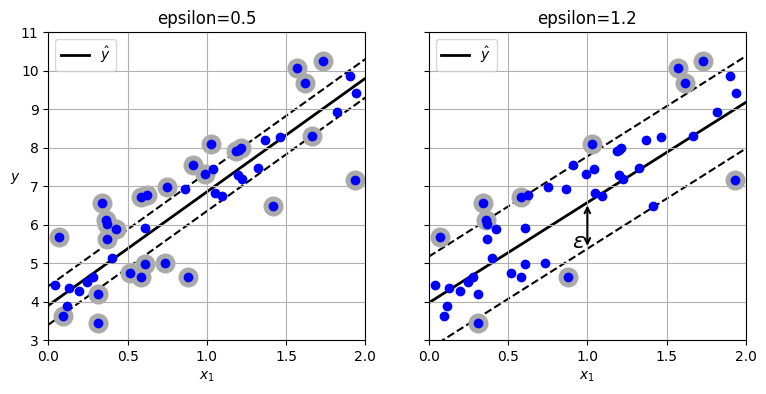

In [75]:
# extra code – this cell generates and saves Figure 5–10

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon=1.2, dual=True, random_state=42))
svm_reg2.fit(X, y)

svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()
plt.show()

In [76]:
#For nonlinear dataset, we can use the kernal functions
from sklearn.svm import SVR

# extra code – these 3 lines generate a simple quadratic dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

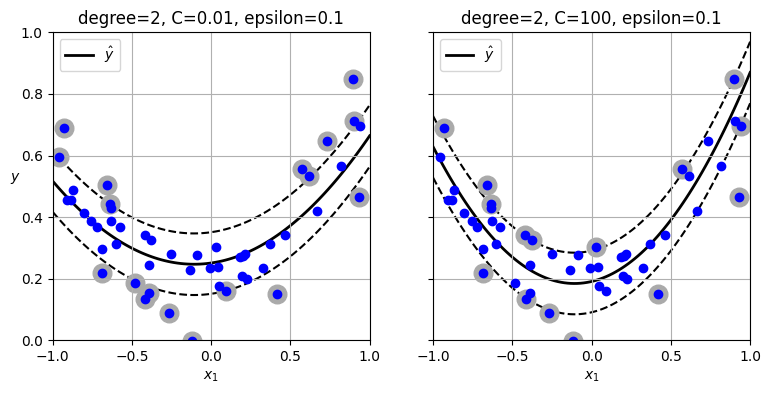

In [78]:
# extra code – this cell generates and saves Figure 5–11

svm_poly_reg2 = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=100))
svm_poly_reg2.fit(X, y)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()
plt.show()

In [89]:
%%HTML
<h2>K Nearest Neighbours (KNN)</h2>
It is a supervised algorithm that is used for both classification and regression. 
It is a simple classification/ regression algorithm where no model fits and no underlying assumptions(hyperparameters) is needed.
In this algorithm, there is no training required as we are not fitting any model here.
<img src="images/knn.png" width=400 />
<b> Pseudo code of KNN</b>
<br/>
1. Find the distance between(normally, euclidean) the new data points and all the labelled training data points.
2. Then we sort the points from nearest to furthest distance.
3. Take first k number of data points
4. find out which class has the highest number of data points. The new data point belongs to the class of  highest number points in that k samples.
<br/>
<br/>
There are various distance metrics:
<br/>
1. <b>Euclidean Distance</b>:
It represents the shortest distance between two vectors.
It is the square root of the sum of squares of differences between corresponding elements.
<img src="images/dm1.png" width=400 />
2. <b>Manhattan Distance</b>: It is the sum of absolute differences between points across all the dimensions.
<img src="images/dm2.png" width=400 />
3. <b>Hamming Distance</b>: It is mainly used for categorical variables . If values of x & y are the same, 
then the d will be zero, otherwise d will be 1.

In [94]:
%%HTML
<h4>KNN as a feature engine</h4>
KNN can be used to add local knowledge in a stage process with other classification techniques.
KNN is run on the data and for each record, a classification is derived. 
That result can be added as a new feature along with the data to another classification method.

In [96]:
%%HTML
<h3>KNN for regression</h3>
We follow almost all the same steps as classification. In the end, instead of finding the class that has the majority of points. 
We take an average of these k data points to compute the regression value.